# Imports

In [205]:
import os
from nn import SimpleFFNN
from train import Train
from preProcessing import PreProcessing
import numpy as np
from testModel import TestModel
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spellchecker import SpellChecker
import re
import nltk
import contractions
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [206]:
# Função para dividir os dados de treino e de teste
def split_array(data: np.ndarray, train_size: float = 0.8):
    """
    Divide um array 2D em dois arrays: um com train_size dos dados e outro com o restante.
    
    :param data: O array 2D a ser dividido.
    :param train_size: A proporção de dados a serem usados para o primeiro array (default é 0.8).
    :return: Dois arrays 2D, um com os dados de treinamento e outro com os dados de teste.
    """
    # Calcula o índice para a divisão
    split_index = int(len(data) * train_size)
    
    # Embaralha os dados
    np.random.shuffle(data)
    
    # Divide o array
    train_data = data[:split_index]
    test_data = data[split_index:]
    
    return train_data, test_data

In [207]:
# Reading the file and converting it to a DataFrame
def read_file_to_dataframe(filename):
    data = []
    
    with open("./data/" + filename, 'r', encoding='utf-8') as file:
        for linha in file:
            linha = linha.strip()  # Remove leading/trailing spaces and newlines
            filme = linha.split('\t')  # Split by tab
            data.append(filme)  # Append the row to the data list
    
    # Convert the list of rows to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df


# Variaveis onde está os ficheiros de treino e o modelo

In [208]:
#file onde já está o modelo treinado"
model=None
newPKL = "joao3"


#limpesa de ficheiro de treino
data="train"
#ficheiro onde vai ser feita ao autoavaliacao
avaliation = "test_no_labels"

In [209]:
print("\033[34mData to DataFrame\n\033[0m")
# Example usage
df = read_file_to_dataframe(data+".txt")
print(df)

Data to DataFrame

                              0          1        2                        3  \
0                  Ela Cheppanu     Telugu  romance                   Ramana   
1     A Nightmare on Elm Street   American   horror             Samuel Bayer   
2               American Gothic   American   horror               John Hough   
3                          Gang  Bollywood    crime              Mazhar Khan   
4            Intimate Relations    British    drama            Charles Frank   
...                         ...        ...      ...                      ...   
8036              Sa 'Yo Lamang   Filipino    drama          Laurice Guillen   
8037          The Lemon Sisters   American    drama             Joyce Chopra   
8038      Dil Ne Phir Yaad Kiya  Bollywood  romance                  Unknown   
8039  Rehnaa Hai Terre Dil Mein  Bollywood  romance            Gautham Menon   
8040             Things to Come    British   sci-fi  William Cameron Menzies   

                    

8041
Average word count: 370.33


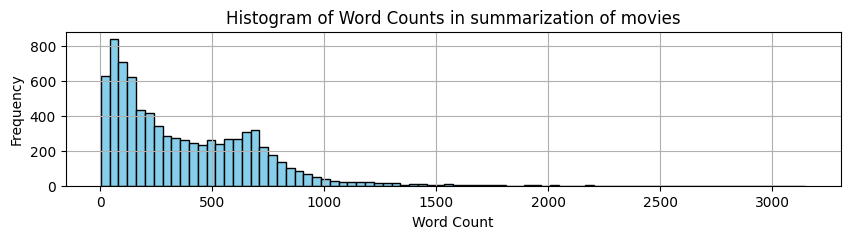

In [210]:
# histogram of word count
print(len(df))

df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


the: 161014
to: 111607
and: 106034
a: 80092
of: 53504
is: 49072
his: 43843
in: 43811
he: 30869
that: 30744


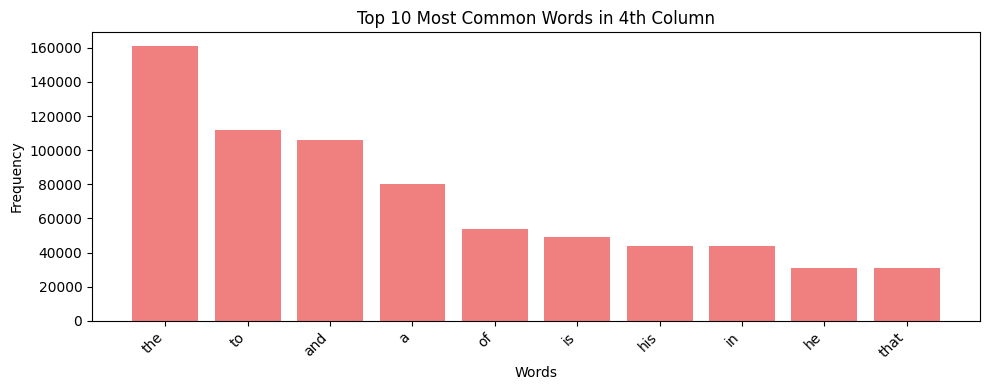

In [211]:
# Flatten all words from the 4th column into a single list
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

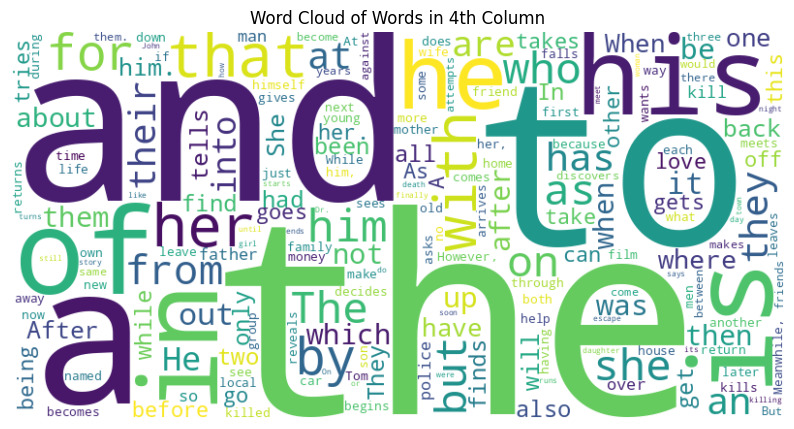

In [212]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

In [213]:
# Check for typos using the pyspellchecker
spell = SpellChecker()
misspelled_words = spell.unknown(all_words)  # Identify misspelled words

# Display the number of potential typos
print(f"Number of potential typos: {len(misspelled_words)}")

# Optionally, print the misspelled words
print("\nPotential typos detected:")
for word in misspelled_words:
    print(word)

Number of potential typos: 110045

Potential typos detected:
wanderer,
(witch)
br.
user)
earlier).
kazak's
quatermass,
sui-wah
(sibiraj),
stribling
individual.
heung,
trudi
demonstration,
qaeda
evil-lyn's
hiralal
tania,
activists'
lizzie,
argotron
silhouettes,
lai.
margarita,
motaw
bootle-beetle
cypriot
konoha.
pavankhind
sham-marry
venkatesh
minions.
mansion:
angrily,
danila.
butlers.
intercept.
disillusioned,
buckboard,
(macaroni)
ultimately,
mchale).
newspaper[7]—that
confidence.
fukrey
bradmans
alakay
manivannan
cobbs)
retreat.
lumerian
exfiltrate.
lynley)
qualifications.
winner-take-all
meantime.
poems,
coincidentally,
tony's.
montini
informant,
stage-side
red'
selkie
efficient.
palanquin,
franco.
grissom
augie;
belman
bb's
giselle
goess
mortimer.
johnston
ft
diminish,
parera
attendees,
one-year
controlling.
4-f,
bayou,
chiharu,
custer.
$100:
rasenshuriken
commitment.
1981,
teasing,
justin),
woodcutters'
calistratus's
leichner,
kupak;
house-owner's
(55
shuvaa
torment,
harmless.
mc

## Pre Processamento

In [214]:
# Function to standardize dates
def standardize_dates(text):
    def _month_to_number(month_name):
        try:
            return datetime.strptime(month_name, "%b").month  # Abbreviated month names (e.g., "Feb")
        except ValueError:
            try:
                return datetime.strptime(month_name, "%B").month  # Full month names (e.g., "February")
            except ValueError:
                return None  # Return None for invalid month names

    def _handle_two_digit_year(year):
        if not year:  # If year is None or empty
            return ""
        year = int(year)
        return year + 2000 if year < 100 else year

    # Date normalization using regex
    text = re.sub(
        r'(\b[A-Za-z]+) (\d{1,2})(?:st|nd|rd|th)?(?:,)? (\d{4})?',
        lambda match: (
            f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}/{match.group(3)}"
            if _month_to_number(match.group(1)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(2)):02d}/{_month_to_number(match.group(1)):02d}"
            if _month_to_number(match.group(1)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    # Handle formats like "8-Feb-2013"
    text = re.sub(
        r'(\d{1,2})(?:st|nd|rd|th)?[-/.](\b[A-Za-z]+)\b[-/.]?(\d{2,4})?',
        lambda match: (
            f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}/{_handle_two_digit_year(match.group(3))}"
            if _month_to_number(match.group(2)) is not None and match.group(3)  # Ensure month and year exist
            else f"{int(match.group(1)):02d}/{_month_to_number(match.group(2)):02d}"
            if _month_to_number(match.group(2)) is not None  # Ensure month exists
            else match.group(0)  # Return original text if invalid month
        ),
        text
    )

    return text

In [215]:
# lowercasing
def lowercase_text(text):
    return text.lower()

In [216]:
# lammington
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [217]:
# stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text, stop_words=stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower()]
    return " ".join(filtered_words)

In [218]:
#contractions
def expand_contractions(text):
    if not isinstance(text, str) or not text:
        # Return an empty string or the original text if it's not a valid string
        return text

    try:
        # Use contractions.fix to expand contractions in the text
        return contractions.fix(text)
    except IndexError as e:
        print(f"IndexError encountered: {e}")
        # Optionally return the original text if there's an error
        return text


In [219]:
print("\033[34mPre Processing the data\n\033[0m")
# Example preprocessing pipeline
def preprocess_text(text):
    text = expand_contractions(text)       # Step 1: Expand contractions
    text = standardize_dates(text)         # Step 2: Normalize dates
    text = lowercase_text(text)            # Step 3: Convert to lowercase
    text = remove_stopwords(text)          # Step 4: Remove stopwords
    text = lemmatize_text(text)            # Step 5: Lemmatize the text
    return text

# Example usage

df.iloc[:, 4] = df.iloc[:, 4].apply(preprocess_text)

print("\033[32mPre Processing Completed!\n\033[0m")

Pre Processing the data

IndexError encountered: string index out of range
IndexError encountered: string index out of range
Pre Processing Completed!



Average word count: 209.72


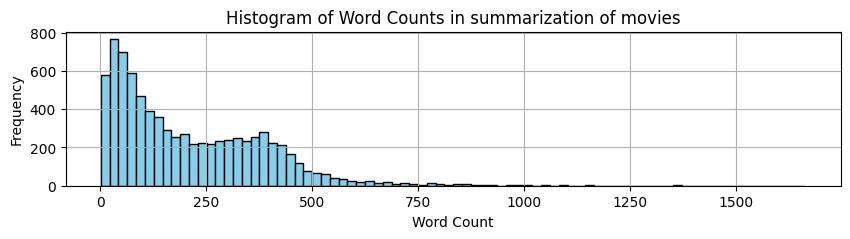

In [220]:
# histogram of word count after pre-processing
df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

find: 7494
get: 6642
one: 6351
go: 6170
take: 6170
tell: 5439
back: 4902
kill: 4651
him.: 4475
two: 4360


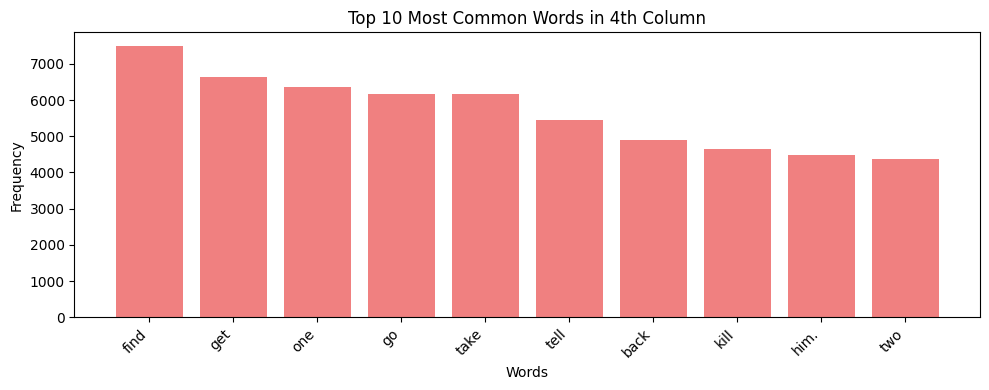

In [221]:
# Flatten all words from the 4th column into a single list after pre-processing
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

# Data after Pre Processing

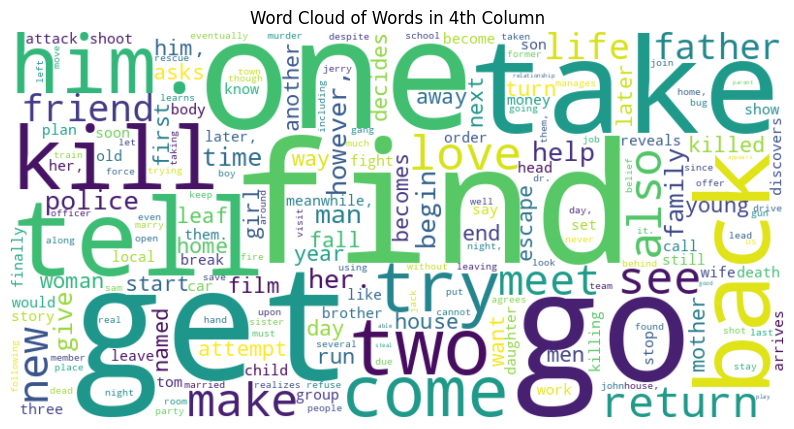

In [222]:
# Generate a word cloud after pre-processing
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

# Dividir a train_data do test_data

In [223]:
data_to_train, data_to_test = split_array(clean_data)

## Carregar o modelo ou Criar um novo
#### Conforme o nome dado a variavel 'newPKL'

In [224]:
# Carregar o modelo se ele já existir
if os.path.isfile("data/"+newPKL+".pkl"):
    print("\033[34mLoading Model\n\033[0m")
    
    model=SimpleFFNN.load_model("data/"+newPKL+".pkl")
    
    print("\033[32mLoading Completed!\n\033[0m")
# Se não existir, cria e treina um novo modelo   
else:
    print("\033[34mCreating a new Model\n\033[0m")
    
    layer_hidden = [50,25,9] # adicionar o numero de nos por camada,hidden, que bem se entender([5]->5 nos na camada hidden1; [3,6]-> 3 na camada hidden 1 e 6 na hidden 2;...)
    learning_rate = 0.01
    epochs=50
    model = Train(data_to_train,newPKL,layer_hidden, learning_rate, epochs)
    model.train()
    
    print("\033[32mModel Created!\n\033[0m")

Creating a new Model



KeyboardInterrupt: 

# Variavel para testar os modelos

In [106]:
model_teste= TestModel(newPKL)

# Teste do modelo com o ficheiro com as labels identificadas
##### 'train.txt'

In [107]:
# Testar e comparar labels
model_teste.test_with_label(data_to_test)

Testing the Model with Labels

For the movie 'A Lowland Cinderella' the model said: 'drama', and was: 'drama'
For the movie 'Mr. 3000' the model said: 'drama', and was: 'comedy'
For the movie 'Marci X' the model said: 'comedy', and was: 'comedy'
For the movie 'Abdulla the Great' the model said: 'drama', and was: 'comedy'
For the movie 'The Monster Walks' the model said: 'horror', and was: 'horror'
For the movie 'Major Barbara' the model said: 'drama', and was: 'drama'
For the movie 'The Tattooed Stranger' the model said: 'crime', and was: 'crime'
For the movie 'Black Joy' the model said: 'drama', and was: 'drama'
For the movie 'The Rescuers' the model said: 'animation', and was: 'animation'
For the movie 'Westward the Women' the model said: 'western', and was: 'western'
For the movie 'The Mutations' the model said: 'horror', and was: 'horror'
For the movie 'Miss March' the model said: 'comedy', and was: 'comedy'
For the movie 'Let George Do It!' the model said: 'drama', and was: 'comed

84.21379738968304

# Gerar ficheiro com os resultados do modelo, com inputs do ficheiro sem  as labels
##### 'test_no_labels.txt'

In [108]:
# Testar e escrever resultados no ficheiro 'results.txt'
pp_no_label = PreProcessing(avaliation+".txt")
clean_data_no_label = pp_no_label.returnCleanText(plot_index=3)
model_teste.test_without_labels(clean_data_no_label)

Testing the Model without Labels

Test Completed!



# Testar apenas com 1 frase de input

In [109]:
texto="Romeo and Juliet is a play written by Shakespeare. It is a tragic love story where the two main characters, Romeo and Juliet, are supposed to be sworn enemies but fall in love. Due to their families' ongoing conflict, they cannot be together, so they kill themselves because they cannot cope with being separated from one another. Romeo and Juliet is a Shakespearean tragedy"
clean_texto=PreProcessing.returnCleanInputText(texto)
genre="romance"
model_teste.test_from_input(clean_texto,genre)

Trying to predict the genre

For the movie given by input the model said: 'romance', and was: 'romance'


# Testar com o nosso ficheiro de teste
##### 'our_data.txt'

In [110]:
print("\033[34mPre Processing the Our data\n\033[0m")
pp=PreProcessing("our_data.txt")
clean_our_data=pp.returnCleanText(plot_index=2)
print("\033[32mPre Processing of Our Data Completed!\n\033[0m")

Pre Processing the Our data

Pre Processing of Our Data Completed!



In [111]:
model_teste.test_with_label(clean_our_data,genre_index=1,plot_index=2)

Testing the Model with Labels

For the movie 'Dune' the model said: 'animation', and was: 'sci-fi'
For the movie 'Shrek' the model said: 'animation', and was: 'animation'
For the movie 'The Teacher' the model said: 'drama', and was: 'drama'
For the movie 'Coco' the model said: 'animation', and was: 'animation'
For the movie 'How I Met Your Mother' the model said: 'comedy', and was: 'comedy'
For the movie 'Scary Movie' the model said: 'horror', and was: 'comedy'
For the movie 'Back to the Future' the model said: 'romance', and was: 'sci-fi'
For the movie 'Scream' the model said: 'action', and was: 'horror'
For the movie 'Fast and Furious' the model said: 'drama', and was: 'action'
For the movie '10 Things I Ate About You' the model said: 'romance', and was: 'romance'
For the movie 'O Rei Leao' the model said: 'animation', and was: 'animation'
For the movie 'Django Unchained' the model said: 'action', and was: 'western'
For the movie 'Fada Oriana' the model said: 'animation', and was: 'a

54.285714285714285